# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat8"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.5322808027267456
Epoch 1, Loss 1.5102407932281494
Epoch 2, Loss 1.4996677041053772
Epoch 3, Loss 1.5416759848594666
Epoch 4, Loss 1.5145220756530762
Epoch 5, Loss 1.5171180367469788
Epoch 6, Loss 1.4819952845573425
Epoch 7, Loss 1.4670372009277344
Epoch 8, Loss 1.4960920810699463
Epoch 9, Loss 1.471681296825409
Epoch 10, Loss 1.5044164657592773
Epoch 11, Loss 1.4990975260734558
Epoch 12, Loss 1.4739297032356262
Epoch 13, Loss 1.4652036428451538
Epoch 14, Loss 1.485004484653473
Epoch 15, Loss 1.4611558318138123
Epoch 16, Loss 1.4483109712600708
Epoch 17, Loss 1.4377074241638184
Epoch 18, Loss 1.4549144506454468
Epoch 19, Loss 1.4392266869544983
Epoch 20, Loss 1.438965380191803
Epoch 21, Loss 1.4451531171798706
Epoch 22, Loss 1.451826274394989
Epoch 23, Loss 1.4189094305038452
Epoch 24, Loss 1.4412449598312378
Epoch 25, Loss 1.428985595703125
Epoch 26, Loss 1.4209003448486328
Epoch 27, Loss 1.3980821371078491
Epoch 28, Loss 1.420554757118225
Epoch 29, Loss 1.4050259590148

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

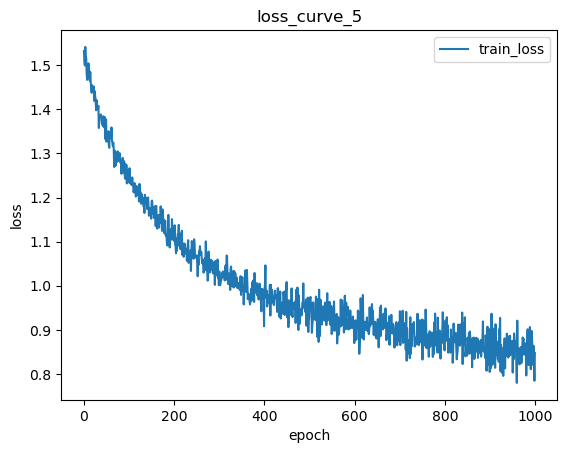

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[60, 14], [4, 18]]
Accuracy for class 0 = 81.08108108108108%
Accuracy for class 1 = 81.81818181818181%
Overall accuracy = 81.25%


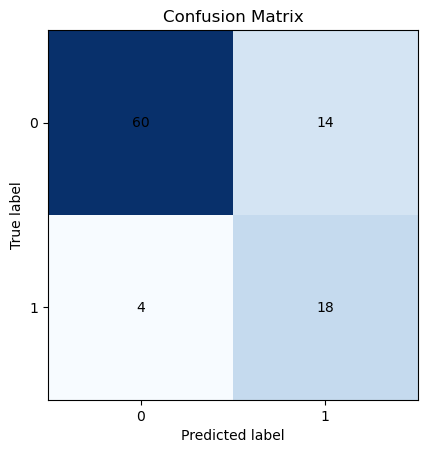

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

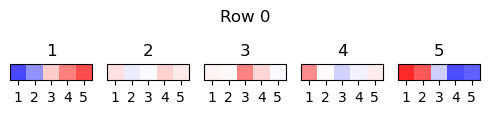

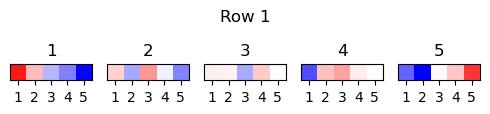

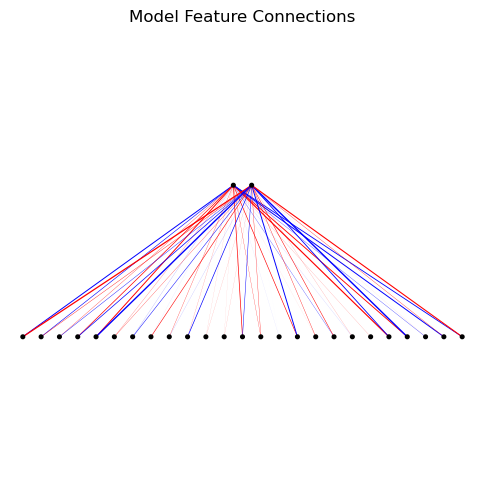

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()